In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv('train.csv')

Min Max AVG

In [32]:
# ENGINE __________________________________________________

df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')

df = df.astype({
    'engine_capacity': float,
})


min = df['engine_capacity'].min()
max = df['engine_capacity'].max()
mean = df['engine_capacity'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  0.0
Max:  5998.0
Media:  1423.1701441170144


In [33]:
# KMS __________________________________________________

df['kms_driven'] = df['kms_driven'].str.replace('Kms', '')
df['kms_driven'] = df['kms_driven'].str.replace(',', '').str.strip()

df = df.astype({
    'kms_driven': float,
})

min = df['kms_driven'].min()
max = df['kms_driven'].max()
mean = df['kms_driven'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)


Min:  286.0
Max:  1200000.0
Media:  58180.675696982726


In [34]:
# MAX POWER __________________________________________________
#convert to bhp
Correct_Max_Power = []
for power in df['max_power']:
    if pd.notna(power):
        if isinstance(power, str):
            if 'bhp' in power:
                num_bhp = float(re.search(r'\d+.?\d', power).group())
                Correct_Max_Power.append(num_bhp)
            elif 'PS' in power:
                num_ps = float(re.search(r'\d+.?\d', power).group())
                num_bhp = round(num_ps * 0.98632, 2)
                Correct_Max_Power.append(num_bhp)
            else:
                num = re.search(r'\d+\.?\d*', power)
                Correct_Max_Power.append(float(num.group()) if num else None)
        else:
            Correct_Max_Power.append(power)
    else:
        Correct_Max_Power.append(None)


# Convert not NaN to float
Correct_Max_Power = [float(value) if value is not None else value for value in Correct_Max_Power]

df['max_power'] = Correct_Max_Power

df = df.astype({
    'max_power': float,
})

min = df['max_power'].min()
max = df['max_power'].max()
mean = df['max_power'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  25.4
Max:  558.0
Media:  103.88974615994809


In [35]:
# SEATS  __________________________________________________

min = df['seats'].min()
max = df['seats'].max()
mean = df['seats'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  2.0
Max:  10.0
Media:  5.2020933400243745


In [36]:
#MILEAGE_____________________________________________________

#assign value to blank lines
df['mileage'] = df['mileage'].fillna(0)

df = df[df['mileage'].notna()]
consumo_correto = []

for i in df['mileage']:
    match = re.search(r'(\d+.\d+|\d+)', str(i))  # Encontrar números (com ou sem ponto decimal)

    if match:
        valor = float(match.group())

        if 'km/kg' in str(i):
            valor *= 1.40  # Converter de km/kg para kmpl

        consumo_correto.append(valor)

df['mileage'] = consumo_correto

df = df.astype({
    'mileage': float,
})

min = df['mileage'].min()
max = df['mileage'].max()
mean = df['mileage'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)

Min:  0.0
Max:  140.0
Media:  18.92554378045285


In [37]:
#PRICE___________________________________________________

min = df['resale_price_Lakh'].min()
max = df['resale_price_Lakh'].max()
mean = df['resale_price_Lakh'].mean()


print("Min: " ,min)
print("Max: ", max)
print("Media: ", mean)


Min:  0.28
Max:  225.0
Media:  8.845202874032676


Blanks e Linhas

In [38]:
df.isna().sum()

full_name             0
registered_year      54
engine_capacity       9
insurance             5
transmission_type     0
kms_driven            3
owner_type           36
fuel_type             0
max_power            89
seats                 7
mileage               0
body_type             0
city                  0
resale_price_Lakh     0
dtype: int64

In [39]:
df.shape

(13956, 14)

Valores

In [40]:
df["full_name"].nunique()

6063

In [41]:
df["insurance"].unique()

array(['Third Party', 'Zero Dep', 'Third Party insurance',
       'Comprehensive', 'Not Available', '1', '2', nan], dtype=object)

In [42]:
df["insurance"].nunique()

7

In [43]:
df["transmission_type"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [44]:
df["owner_type"].unique()

array(['First Owner', 'Third Owner', 'Second Owner', 'Fifth Owner',
       'Fourth Owner', nan], dtype=object)

In [84]:
df["owner_type"].nunique()

5

In [88]:
df["seats"].unique()

array([ 5.,  7.,  4.,  6.,  8.,  9.,  2., nan, 10.])

In [89]:
df["seats"].nunique()

8

In [86]:
df["max_power"].nunique()

404

In [85]:
df["max_power"].unique()

array([ 83.8 ,  88.7 , 117.3 , 167.6 ,  83.1 , 261.4 ,  81.8 , 103.5 ,
       187.7 ,  98.6 ,  67.  , 170.  , 108.5 ,  88.5 , 117.6 , 258.  ,
        74.  , 105.  ,  94.6 ,    nan, 152.8 , 141.  ,  78.9 , 177.  ,
        98.5 , 121.3 , 126.2 ,  91.1 ,  82.  , 103.  , 254.8 , 113.9 ,
        53.6 , 113.1 , 110.  , 118.3 ,  86.8 ,  62.14, 157.8 , 147.9 ,
       116.3 ,  67.1 , 197.2 ,  47.3 , 103.56,  71.  ,  86.7 ,  73.97,
        99.2 , 102.  ,  73.9 ,  58.2 ,  75.  ,  55.9 , 101.6 , 147.8 ,
       121.  ,  85.8 , 130.2 ,  98.9 ,  84.  ,  68.  ,  58.  ,  58.3 ,
       184.  , 108.6 , 148.  ,  78.91,  61.7 ,  88.8 ,  63.  ,  55.2 ,
        79.4 ,  62.1 ,  46.3 , 147.5 ,  65.7 ,  84.8 , 168.5 , 188.  ,
       178.  , 113.4 ,  70.  , 177.4 ,  53.2 ,  73.  , 175.5 ,  62.  ,
       163.  ,  58.1 , 174.3 , 197.  ,  64.1 , 237.3 ,  73.7 , 138.1 ,
        82.9 , 246.7 , 108.4 , 301.7 ,  57.6 , 140.  , 138.  , 325.8 ,
       100.  ,  75.9 , 103.2 , 140.8 ,  76.  , 241.4 , 165.  , 105.5 ,
      

In [45]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric', 'LPG'], dtype=object)

In [90]:
df["mileage"].unique()

array([ 23.84 ,  17.5  ,  17.4  ,  14.08 ,  21.4  ,  17.66 ,  17.52 ,
        16.09 ,  22.48 ,  18.24 ,  21.74 ,  19.27 ,  23.01 ,  21.5  ,
        22.38 ,  18.   ,  22.41 ,  11.   ,  27.39 ,  16.55 ,  19.   ,
        23.59 ,  15.1  ,  18.6  ,   0.   ,  20.36 ,  16.38 ,  18.2  ,
        22.77 ,  17.   ,  17.6  ,  18.15 ,  19.34 ,  11.3  ,  20.7  ,
        22.9  ,  14.84 ,  20.71 ,  17.7  ,  15.8  ,  17.05 ,  18.16 ,
        16.   ,  18.7  ,  14.8  ,  15.74 ,  18.3  ,  15.6  ,  15.68 ,
        18.9  ,  24.2  ,  14.11 ,  16.35 ,  22.05 ,  17.01 ,  23.95 ,
        19.17 ,  17.8  ,  20.   ,  26.1  ,  19.67 ,  12.8  ,  22.07 ,
        26.2  ,  18.06 ,  14.5  ,  34.05 ,  20.51 ,  33.   ,  13.68 ,
        16.36 ,  25.8  ,  17.3  ,  21.21 ,  16.47 ,  13.9  ,  23.   ,
        20.3  ,  23.1  ,  23.2  ,  23.65 ,  21.9  ,  19.81 ,  42.672,
        32.52 ,  18.88 ,  33.54 ,  12.95 ,  24.7  ,  14.1  ,  30.716,
        20.89 ,  22.74 ,  20.14 ,  20.92 ,  13.79 ,  21.1  ,  22.54 ,
        18.97 ,  17.

In [91]:
df["mileage"].nunique()

576

In [46]:
df["body_type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'BMW', 'MUV', 'Maruti', 'Minivans',
       'Mercedes-Benz', 'Cars', 'Coupe', 'Jaguar', 'Wagon', 'Datsun',
       'Pickup', 'Tata', 'Honda', 'Convertibles', 'Hyundai', 'Mahindra',
       'Volvo', 'Toyota', 'Isuzu', 'Skoda', 'Chevrolet'], dtype=object)

In [92]:
df["body_type"].nunique()

24

In [47]:
df["city"].unique()

array(['Pune', 'Jaipur', 'Mumbai', 'Kolkata', 'Delhi', 'Bangalore',
       'Hyderabad', 'Chennai', 'Gurgaon', 'Chandigarh', 'Ahmedabad',
       'Lucknow', 'Agra'], dtype=object)

In [93]:
df["city"].nunique()

13

In [48]:
df["engine_capacity"].nunique()

153

In [49]:
df["engine_capacity"].unique()

array([1199., 1497., 1956., 1197., 2993., 1598., 1995.,  999., 2143.,
       2987., 1248., 2498., 1194., 1364., 2179., 1451., 1999., 1498.,
       1591., 1582., 1462., 1198., 1493.,  799., 1499., 1196.,  995.,
       1482., 1991.,  998., 2199.,  796., 2494.,   nan, 2393., 1298.,
       1799., 1396., 1086.,  814., 1798., 1968., 2982., 1120., 2477.,
       1998., 1985., 3198., 1461., 1193., 1373.,  936., 1399., 1353.,
       2925.,    0., 2967., 1896., 2148., 1997., 2354., 1950.,  624.,
       1186., 2650., 1395., 1368., 1390., 1797., 2694., 1061., 1330.,
       1047., 2755., 1796., 1794., 1969., 2487., 1496., 1595., 1586.,
       2400., 2523., 1332., 2835., 2998., 1596., 1405., 2999., 2157.,
       1108., 1597., 2184., 2956., 1341., 2996.,   72., 1490., 1993.,
       2497., 4367., 3498., 2953., 1495., 4999., 1388., 1984., 1589.,
       2696., 2609., 2198., 2360., 5000., 4663., 1996., 1150.,  993.,
       3604., 2446., 3200., 1172., 4134., 5461., 2995., 2997., 2496.,
       2499., 3982.,

In [50]:
df["kms_driven"].nunique()

6702

In [51]:
df["kms_driven"].unique()

array([30910., 48089., 51000., ..., 17923., 63389., 33046.])

In [94]:
df["resale_price_Lakh"].unique()

array([ 5.66,  6.64,  5.65, ..., 89.5 ,  0.96, 16.68])

In [95]:
df["resale_price_Lakh"].nunique()

1642

Processamento base

In [52]:
df.loc[df["insurance"] == "Third Party insurance","insurance"] = "Third Party"
df.loc[df["insurance"] == "1","insurance"] = "First"
df.loc[df["insurance"] == "2","insurance"] = "Second"
df.loc[df["insurance"] == "Not Available","insurance"] = np.nan
df["insurance"] = df["insurance"].fillna(df["insurance"].mode()[0])

In [53]:
df["marca"] = df["full_name"].apply(lambda x : x.split()[1])

In [54]:
df["registered_year"] = df["full_name"].str.split().apply(lambda x : int(x[0]))

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
registered_year,13956.0,2016.303310,3.736954,1985.00,2014.0000,2017.00,2019.00,2023.0
engine_capacity,13947.0,1423.170144,479.460107,0.00,1197.0000,1248.00,1498.00,5998.0
kms_driven,13953.0,58180.675697,36636.596899,286.00,32000.0000,54907.00,79265.00,1200000.0
max_power,13867.0,103.889746,45.283052,25.40,78.9000,88.50,118.30,558.0
seats,13949.0,5.202093,0.662253,2.00,5.0000,5.00,5.00,10.0
mileage,13956.0,18.925544,5.716199,0.00,16.8000,18.90,21.50,140.0
resale_price_Lakh,13956.0,8.845203,11.145440,0.28,3.7575,5.82,9.07,225.0


In [56]:
df["registered_year"].nunique()

30

In [57]:
df["registered_year"].unique()

array([2019, 2018, 2015, 2021, 2017, 2013, 2016, 2012, 2022, 2011, 2020,
       2014, 2010, 2009, 2007, 2023, 2008, 2004, 1995, 2005, 2002, 2006,
       2003, 1999, 1985, 2001, 2000, 1998, 1986, 1997], dtype=int64)

In [58]:
df["marca"].nunique()
df["marca"].unique()

array(['Tata', 'Honda', 'Maruti', 'BMW', 'Hyundai', 'Volkswagen',
       'Renault', 'Mercedes-Benz', 'Mahindra', 'Ford', 'Toyota', 'MG',
       'Jaguar', 'Datsun', 'Chevrolet', 'Kia', 'Land', 'Nissan', 'Skoda',
       'Mitsubishi', 'Volvo', 'Audi', 'Citroen', 'Jeep', 'Force', 'Fiat',
       'Lexus', 'Mini', 'Isuzu', 'OpelCorsa', 'Porsche', 'Bentley',
       'Hindustan', 'Daewoo'], dtype=object)

Visualizações

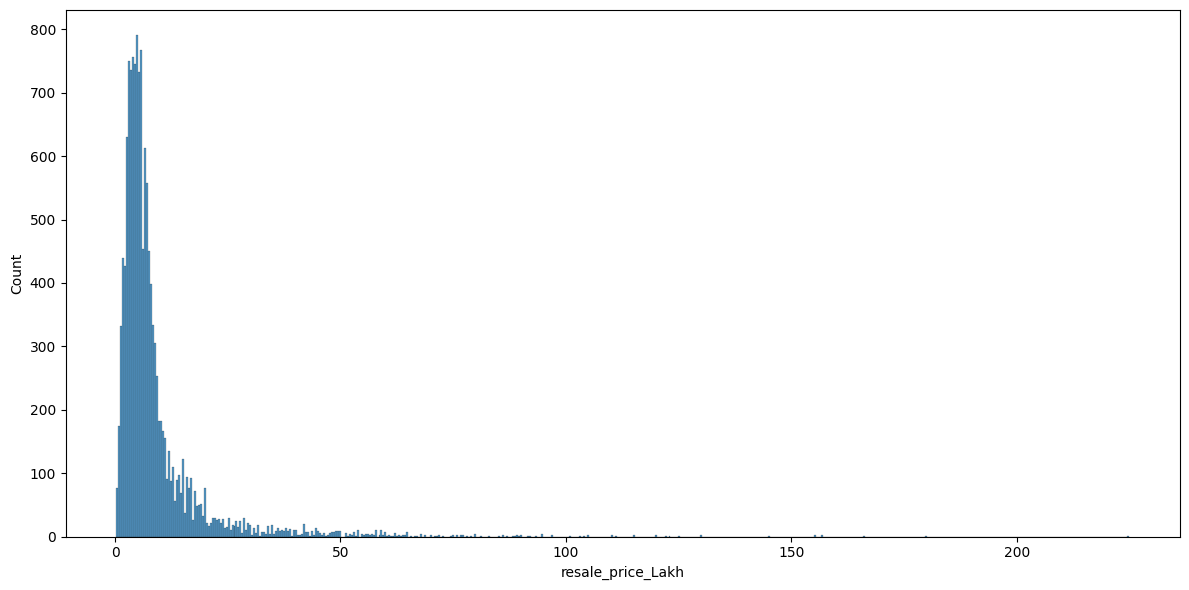

In [59]:

plt.figure(figsize=(12,6))
sns.histplot(x = df["resale_price_Lakh"])
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\3233326078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df["registered_year"], palette=palette)


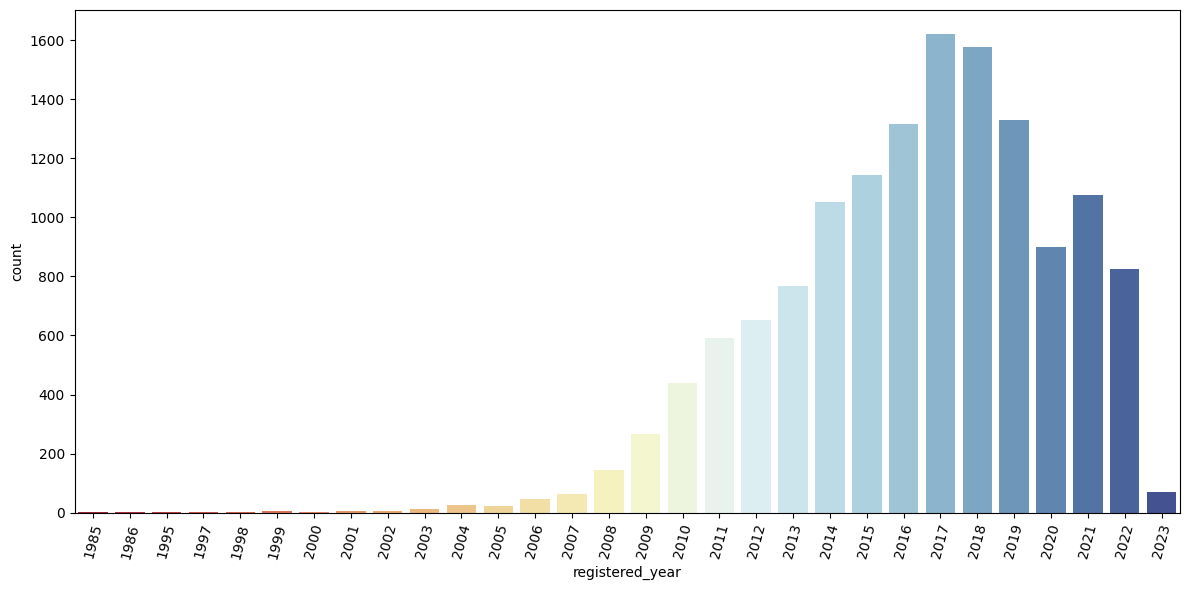

In [60]:
num_colors = len(df["registered_year"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)


plt.figure(figsize=(12, 6))
a = sns.countplot(x=df["registered_year"], palette=palette)
a.tick_params(axis='x', rotation=75)
plt.tight_layout()


plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1847237117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x=df["marca"], palette=palette)


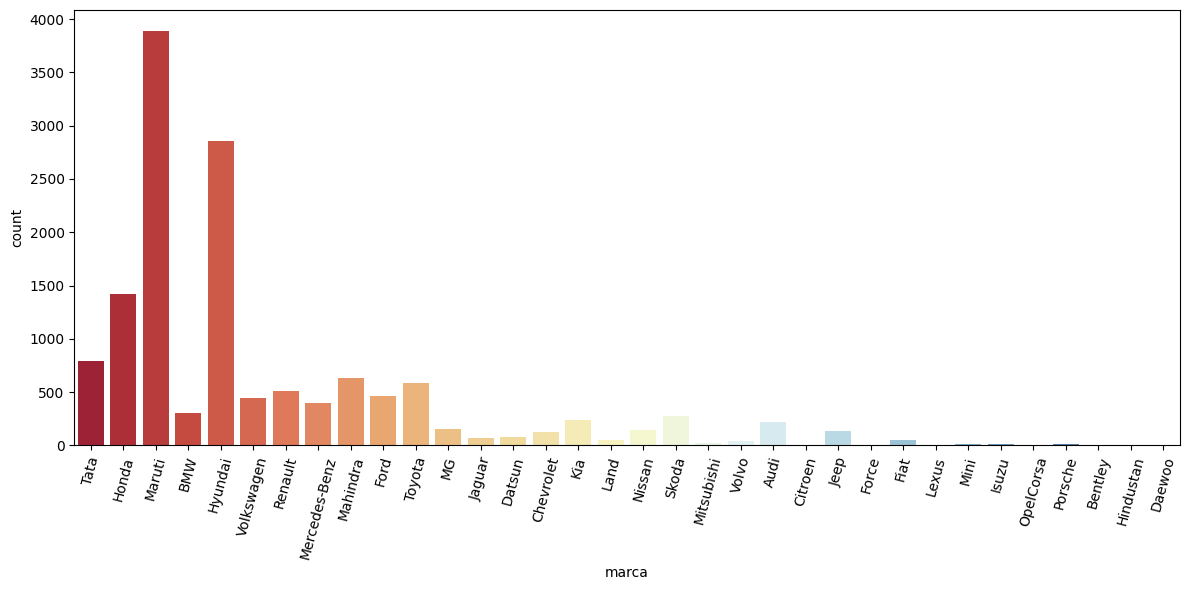

In [61]:
num_colors = len(df["marca"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)


plt.figure(figsize=(12, 6))
a = sns.countplot(x=df["marca"], palette=palette)
a.tick_params(axis='x', rotation=75)
plt.tight_layout()


plt.show()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\2598353673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=car_df["marca"],y=car_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\2598353673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=car_df["marca"],y=car_df["mean"],ax=ax[1],palette="RdYlBu")


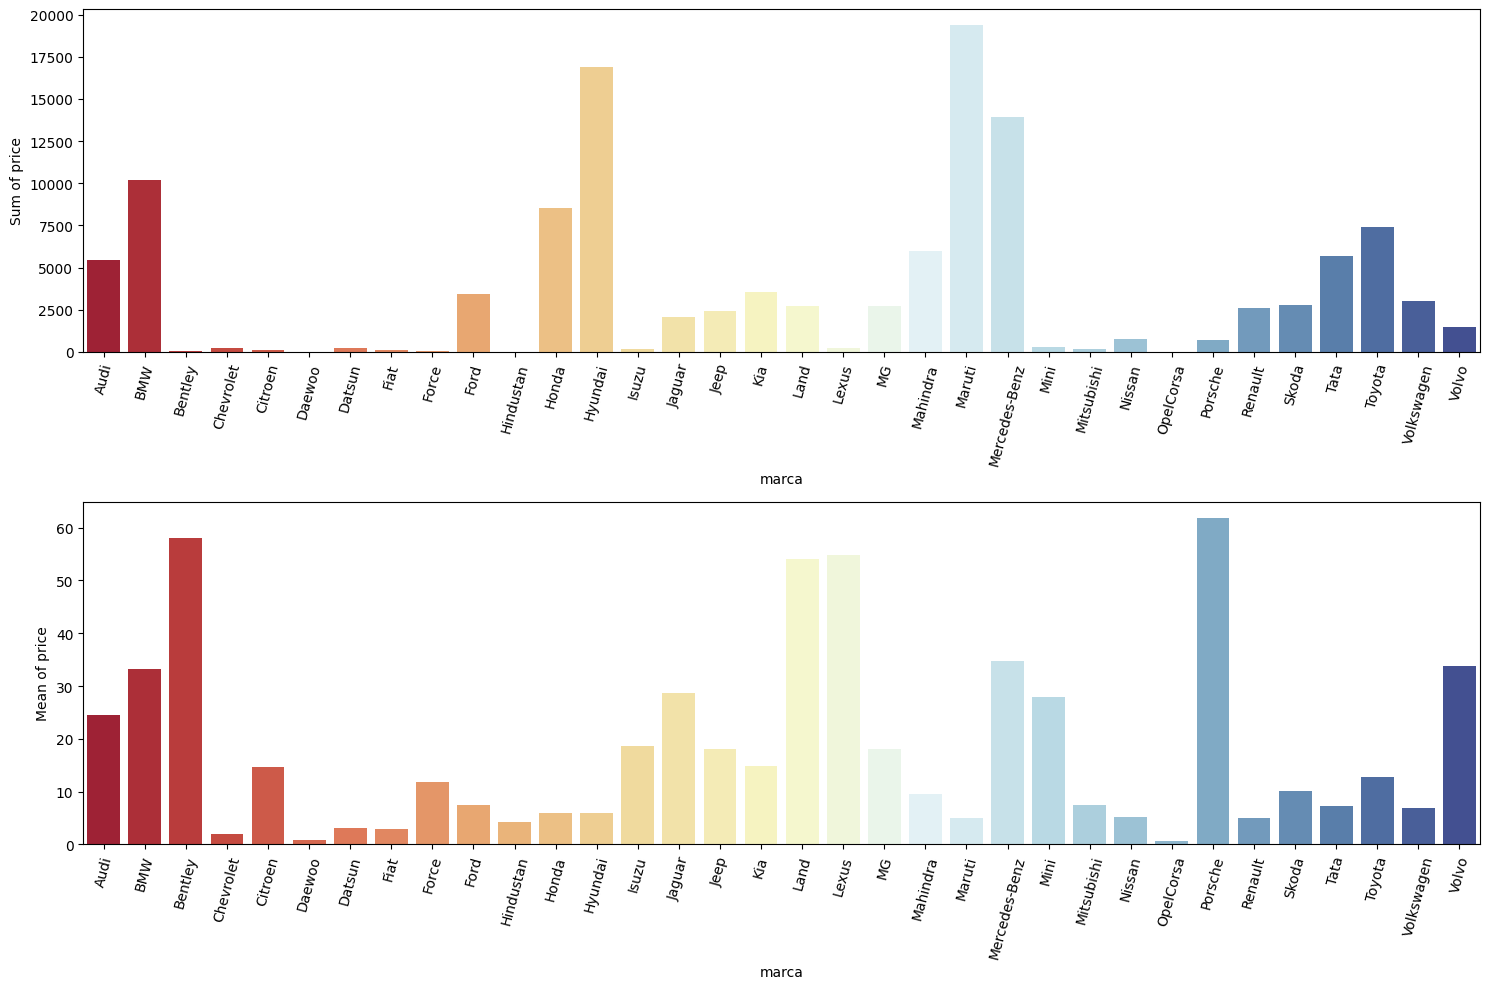

In [62]:
car_df = df.groupby("marca")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=car_df["marca"],y=car_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax1.tick_params(axis='x', rotation=75)
ax2 = sns.barplot(x=car_df["marca"],y=car_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
ax2.tick_params(axis='x', rotation=75)
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\3242498461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["insurance"],palette="RdYlBu")


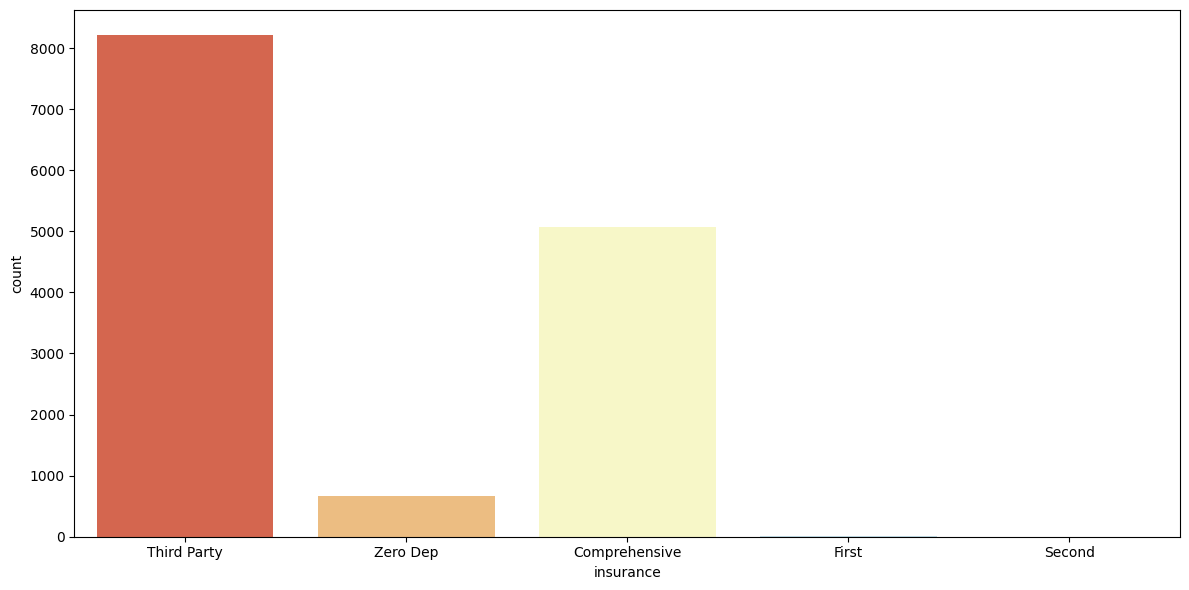

In [63]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["insurance"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1267271880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["insurance"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1267271880.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["insurance"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


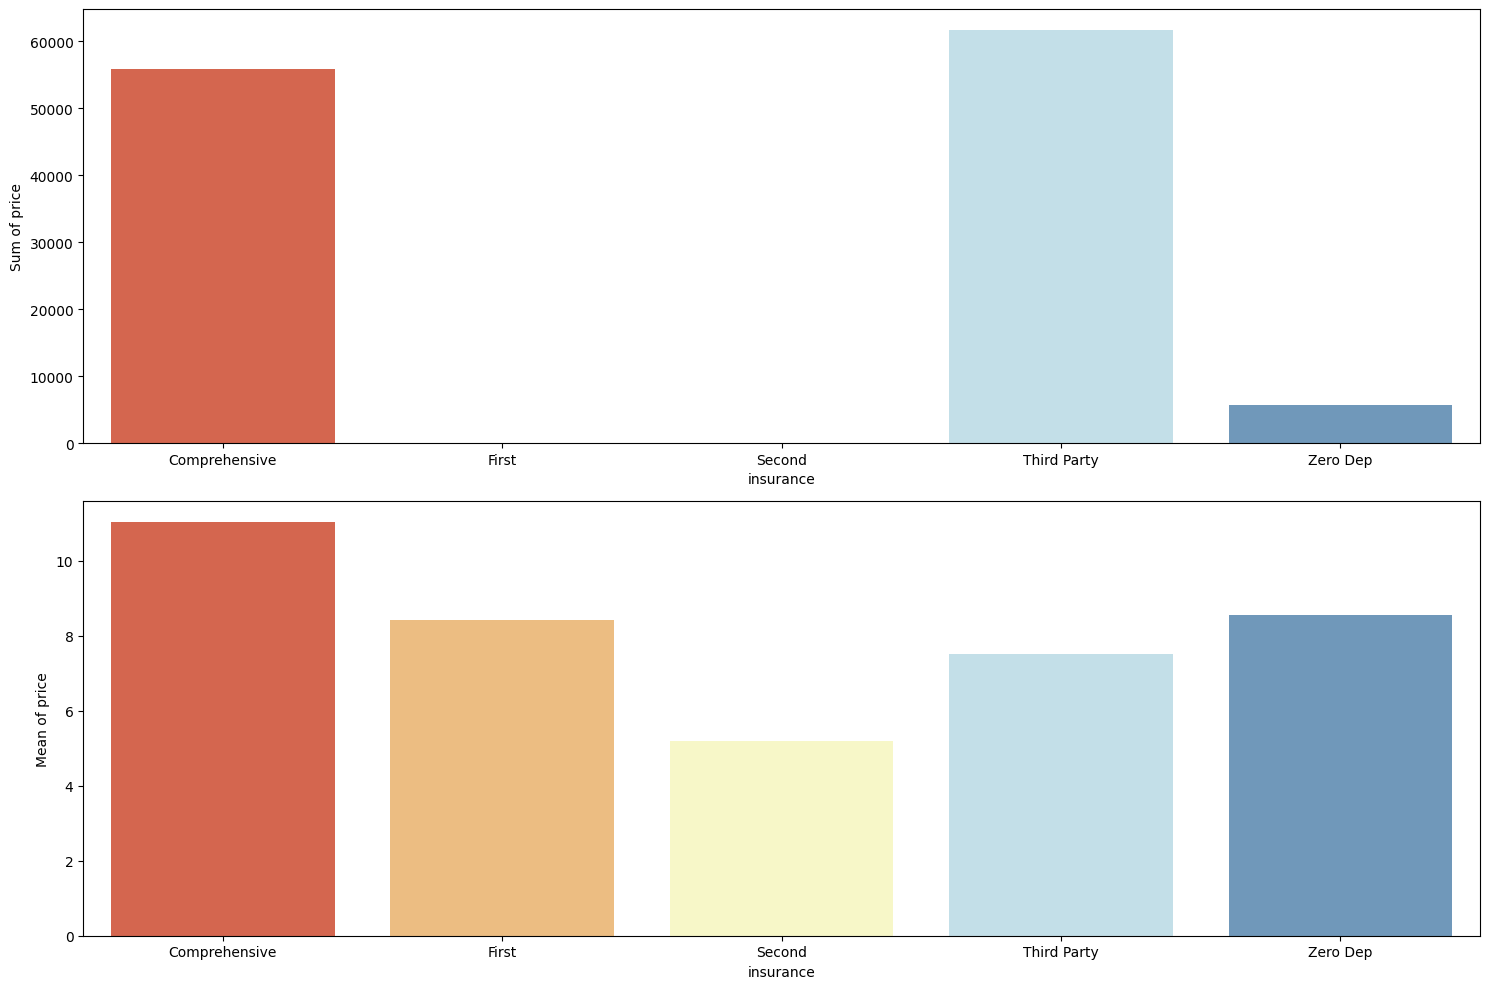

In [64]:
insu_df = df.groupby("insurance")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["insurance"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["insurance"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

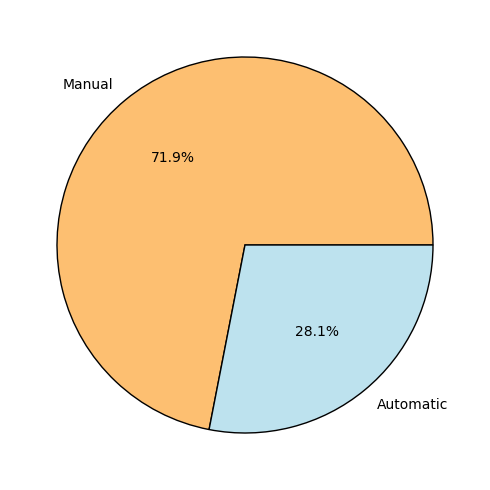

In [65]:

num_colors = len(df["transmission_type"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)

plt.figure(figsize=(8, 5))
trans_dict = dict(df["transmission_type"].value_counts())
plt.pie(trans_dict.values(), labels=trans_dict.keys(), wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%", colors=palette)
plt.tight_layout()

plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1804237566.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["sum"], ax=ax[0], palette=palette)
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1804237566.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["mean"], ax=ax[1], palette=palette)


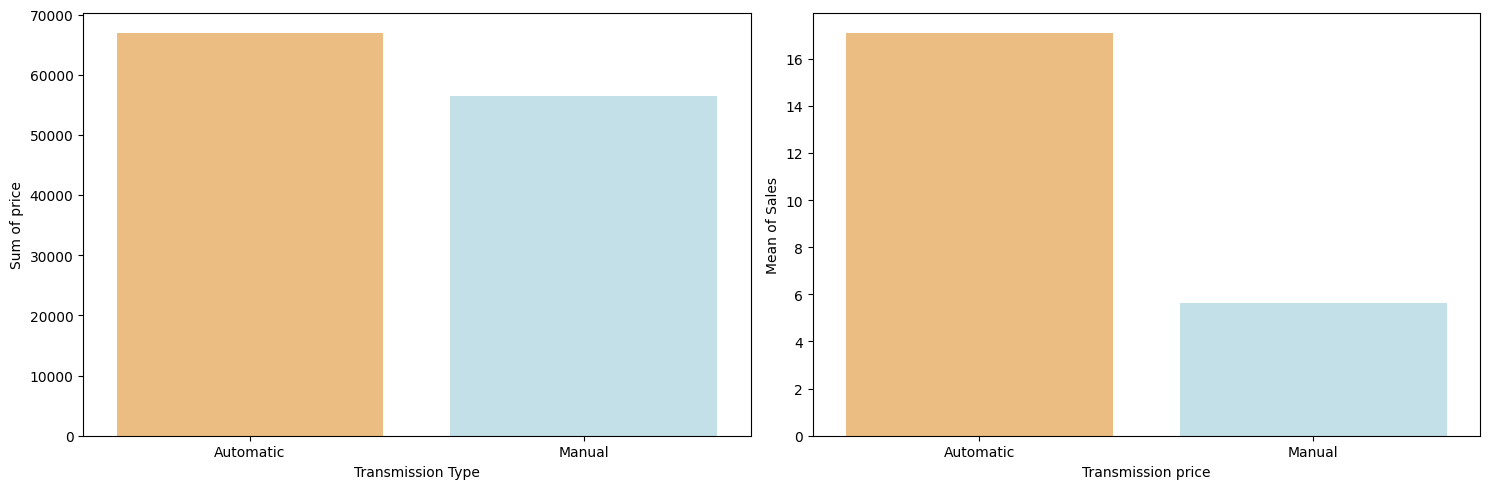

In [66]:
trans_df = df.groupby("transmission_type")["resale_price_Lakh"].agg(["mean", "sum"]).reset_index()

num_colors = len(trans_df["transmission_type"].unique())
palette = sns.color_palette("RdYlBu", n_colors=num_colors)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["sum"], ax=ax[0], palette=palette)
ax1.set_ylabel("Sum of price")
ax1.set_xlabel("Transmission Type")

ax2 = sns.barplot(x=trans_df["transmission_type"], y=trans_df["mean"], ax=ax[1], palette=palette)
ax2.set_ylabel("Mean of Sales")
ax2.set_xlabel("Transmission price")


plt.tight_layout()
plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20024\2415352332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["owner_type"],palette="RdYlBu")


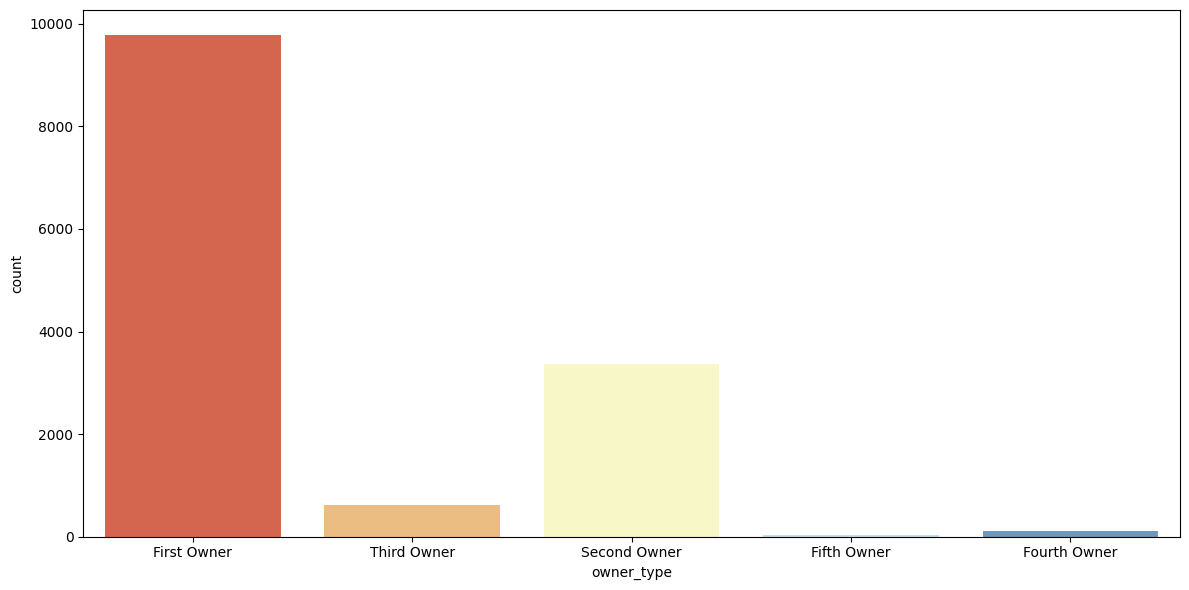

In [67]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["owner_type"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1374633040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["owner_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")


C:\Users\letic\AppData\Local\Temp\ipykernel_20024\1374633040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["owner_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


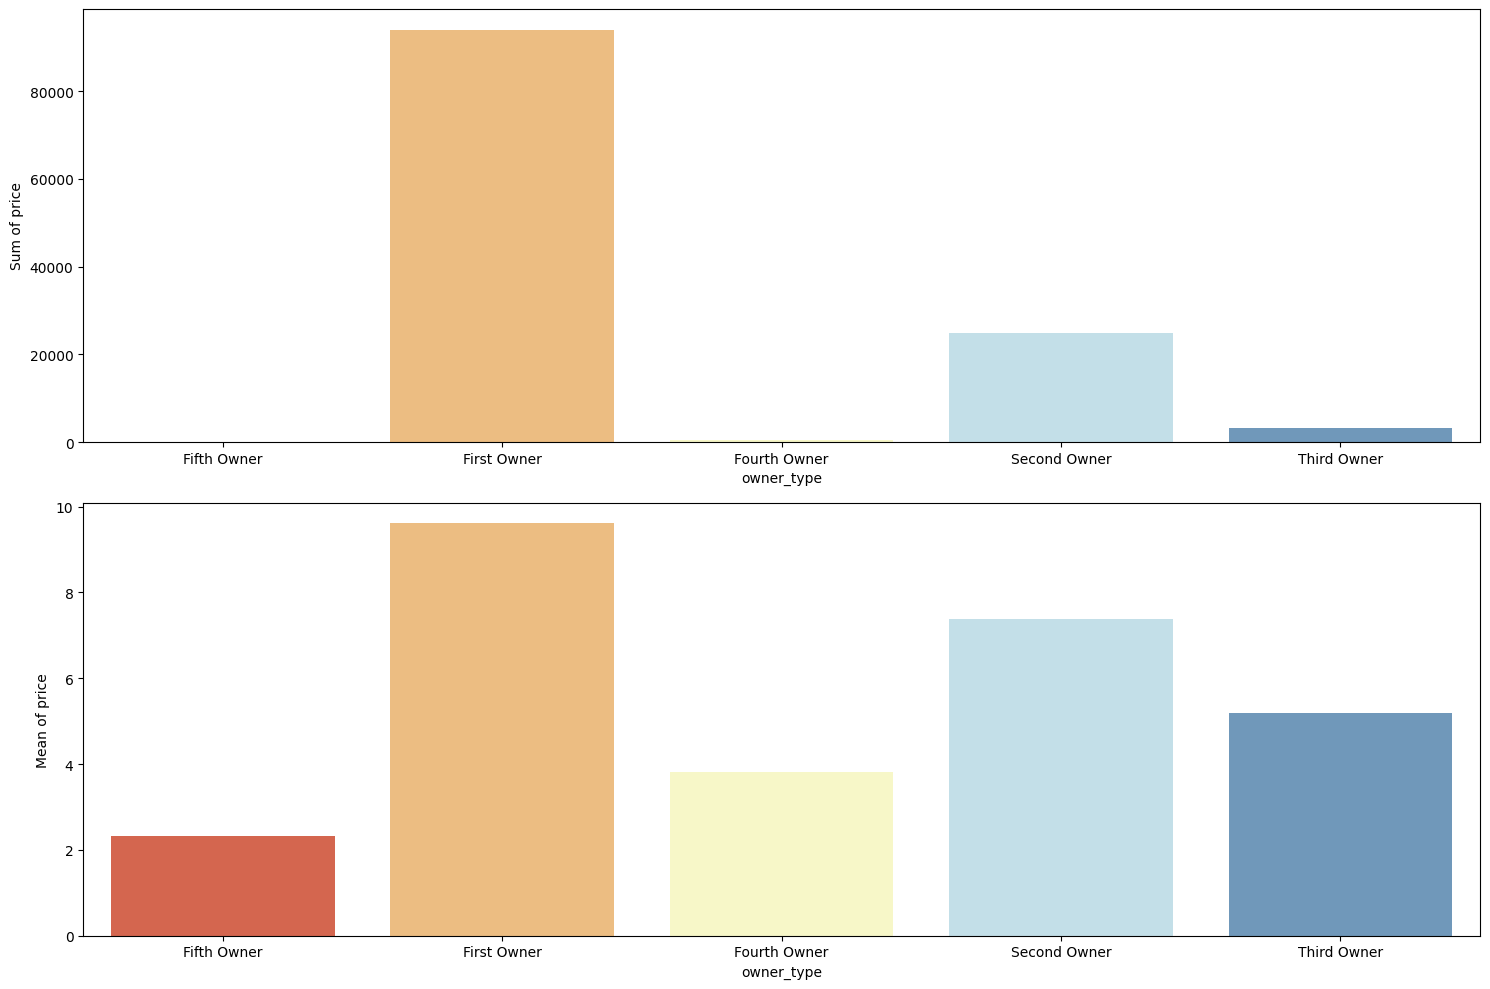

In [68]:
insu_df = df.groupby("owner_type")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["owner_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["owner_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\848152836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["fuel_type"],palette="RdYlBu")


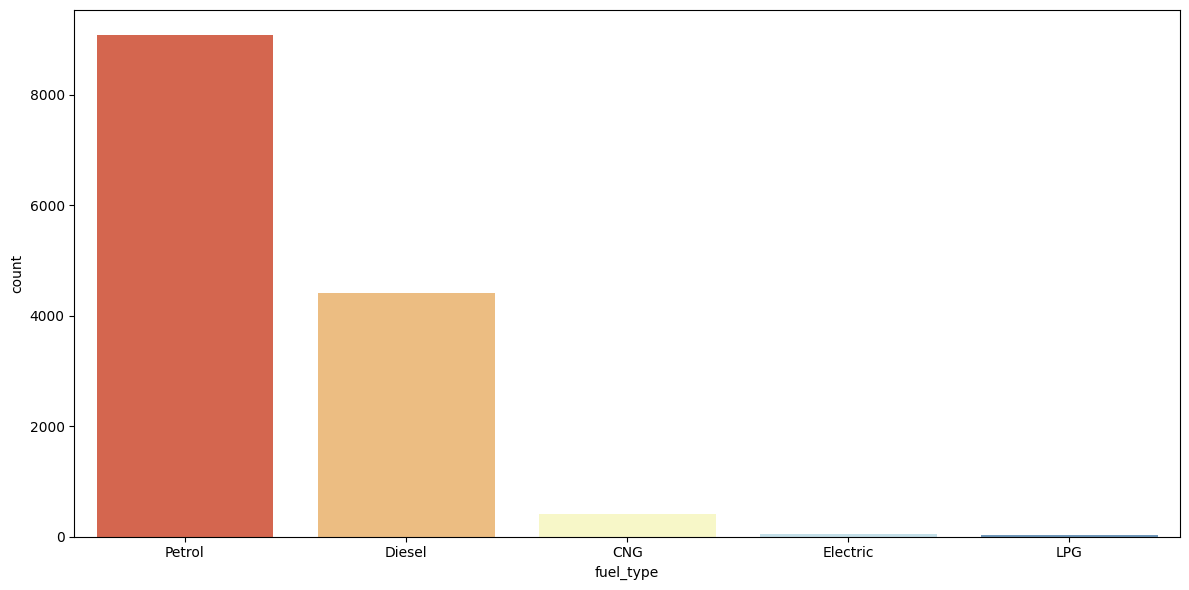

In [69]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["fuel_type"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\3882312284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\3882312284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


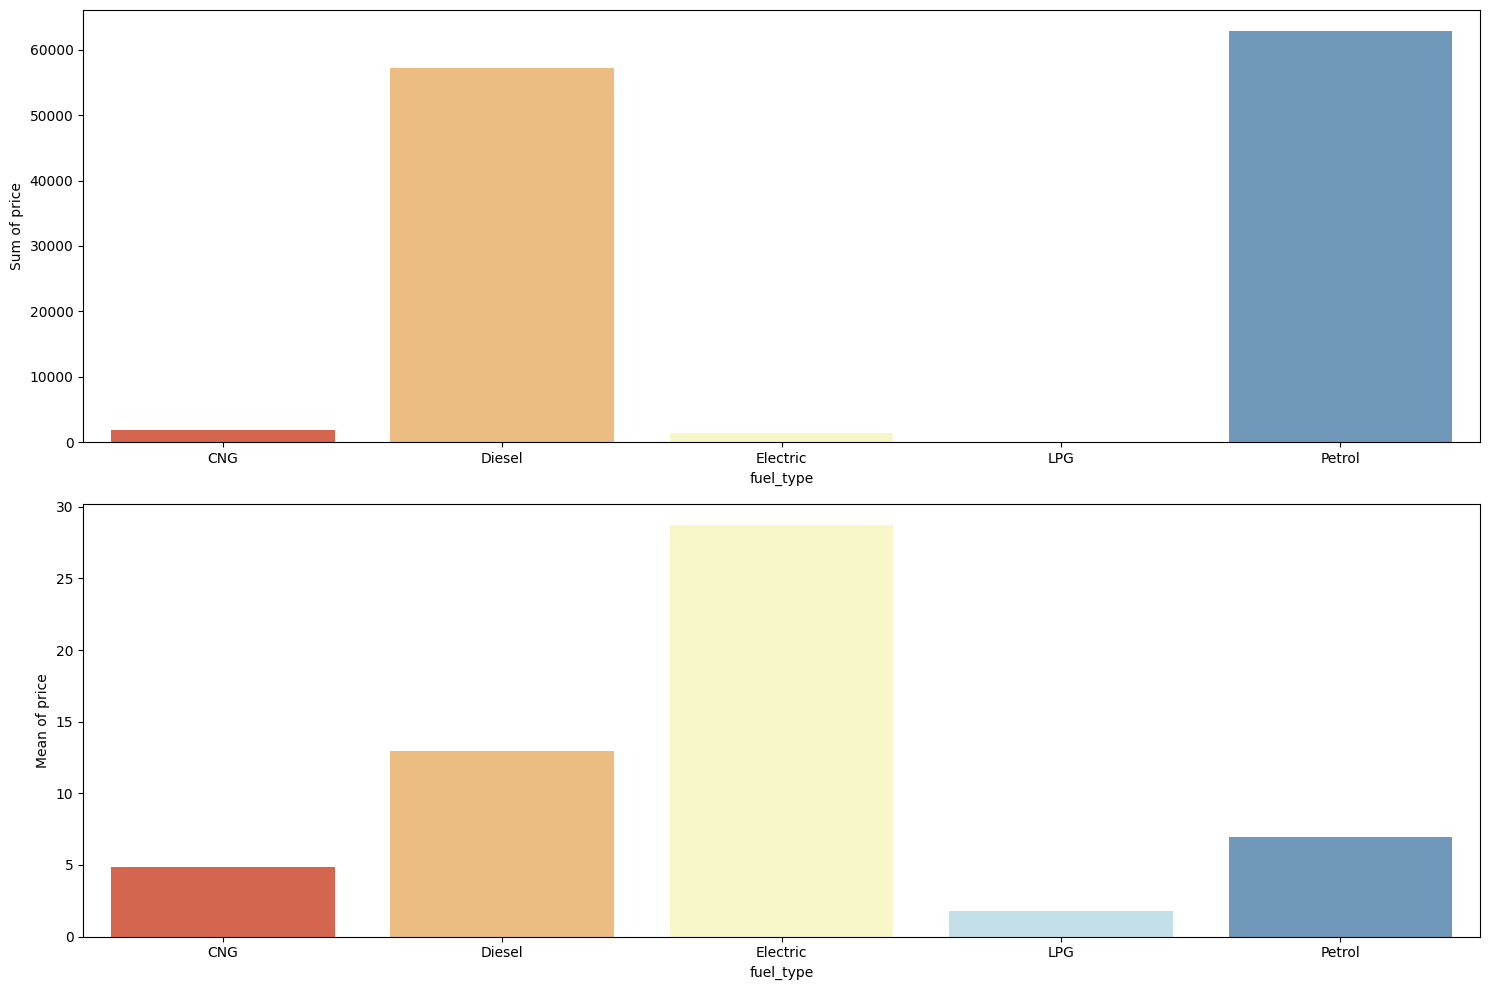

In [70]:
insu_df = df.groupby("fuel_type")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["fuel_type"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\3926344323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x = df["city"],palette="RdYlBu")


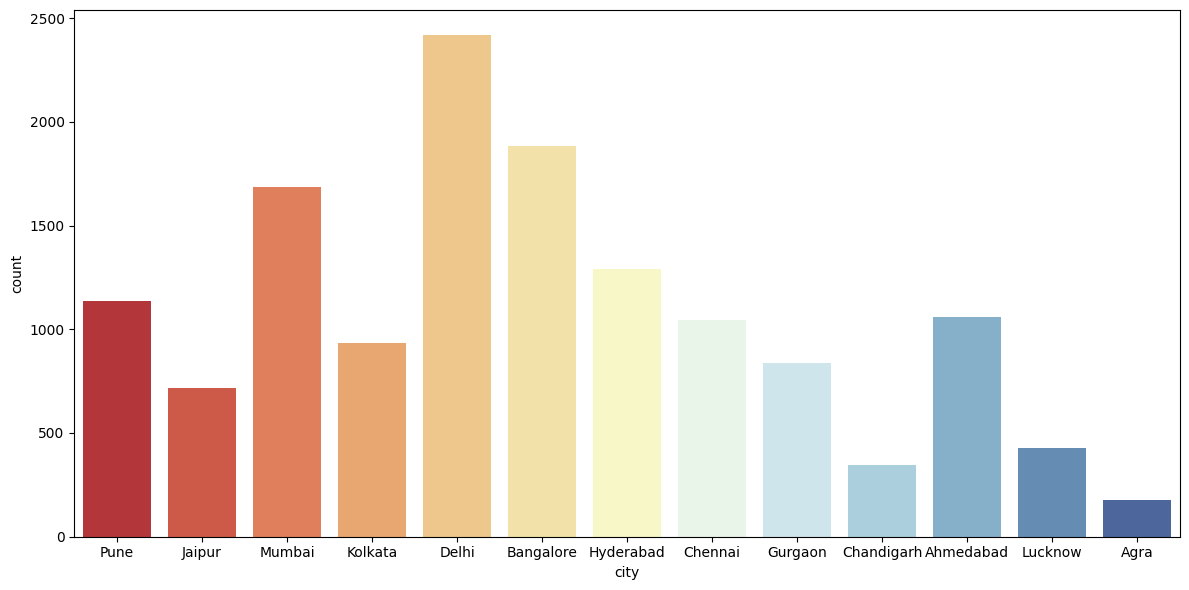

In [71]:
plt.figure(figsize=(12,6))
a = sns.countplot(x = df["city"],palette="RdYlBu")
plt.tight_layout()

C:\Users\letic\AppData\Local\Temp\ipykernel_20024\661445524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=insu_df["city"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\661445524.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=insu_df["city"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")


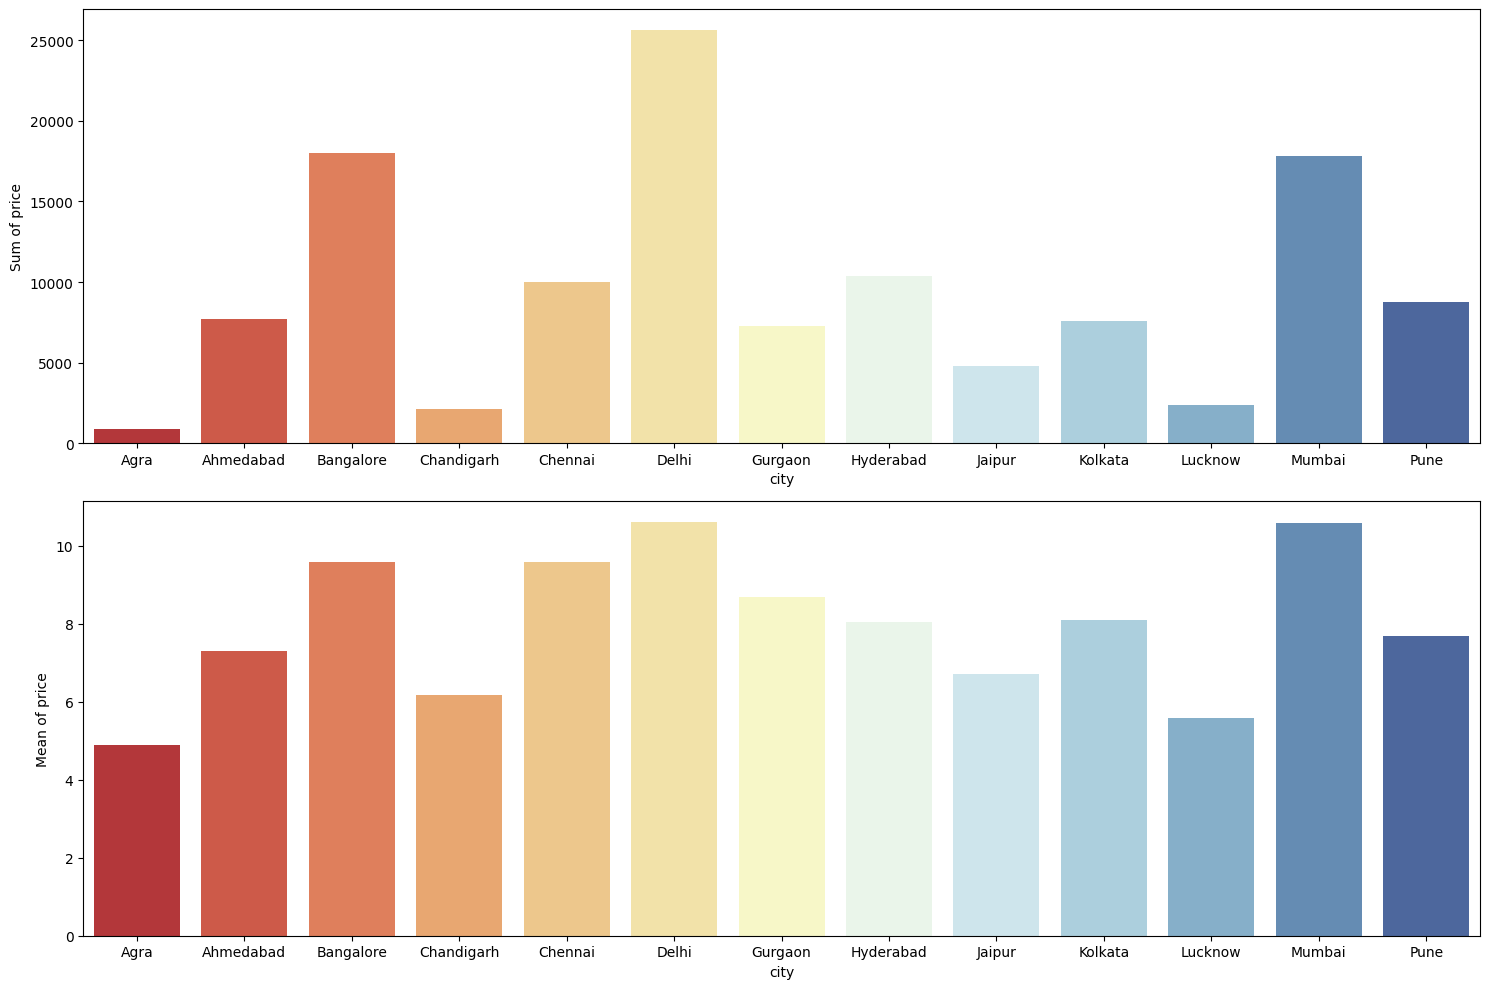

In [72]:
insu_df = df.groupby("city")["resale_price_Lakh"].agg(["mean","sum"]).reset_index()
fig , ax = plt.subplots(2,1,figsize = (15,10))
ax1 = sns.barplot(x=insu_df["city"],y=insu_df["sum"],ax=ax[0],palette="RdYlBu")
ax1.set_ylabel("Sum of price")
ax2 = sns.barplot(x=insu_df["city"],y=insu_df["mean"],ax=ax[1],palette="RdYlBu")
ax2.set_ylabel("Mean of price")
plt.tight_layout()

C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\letic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0;

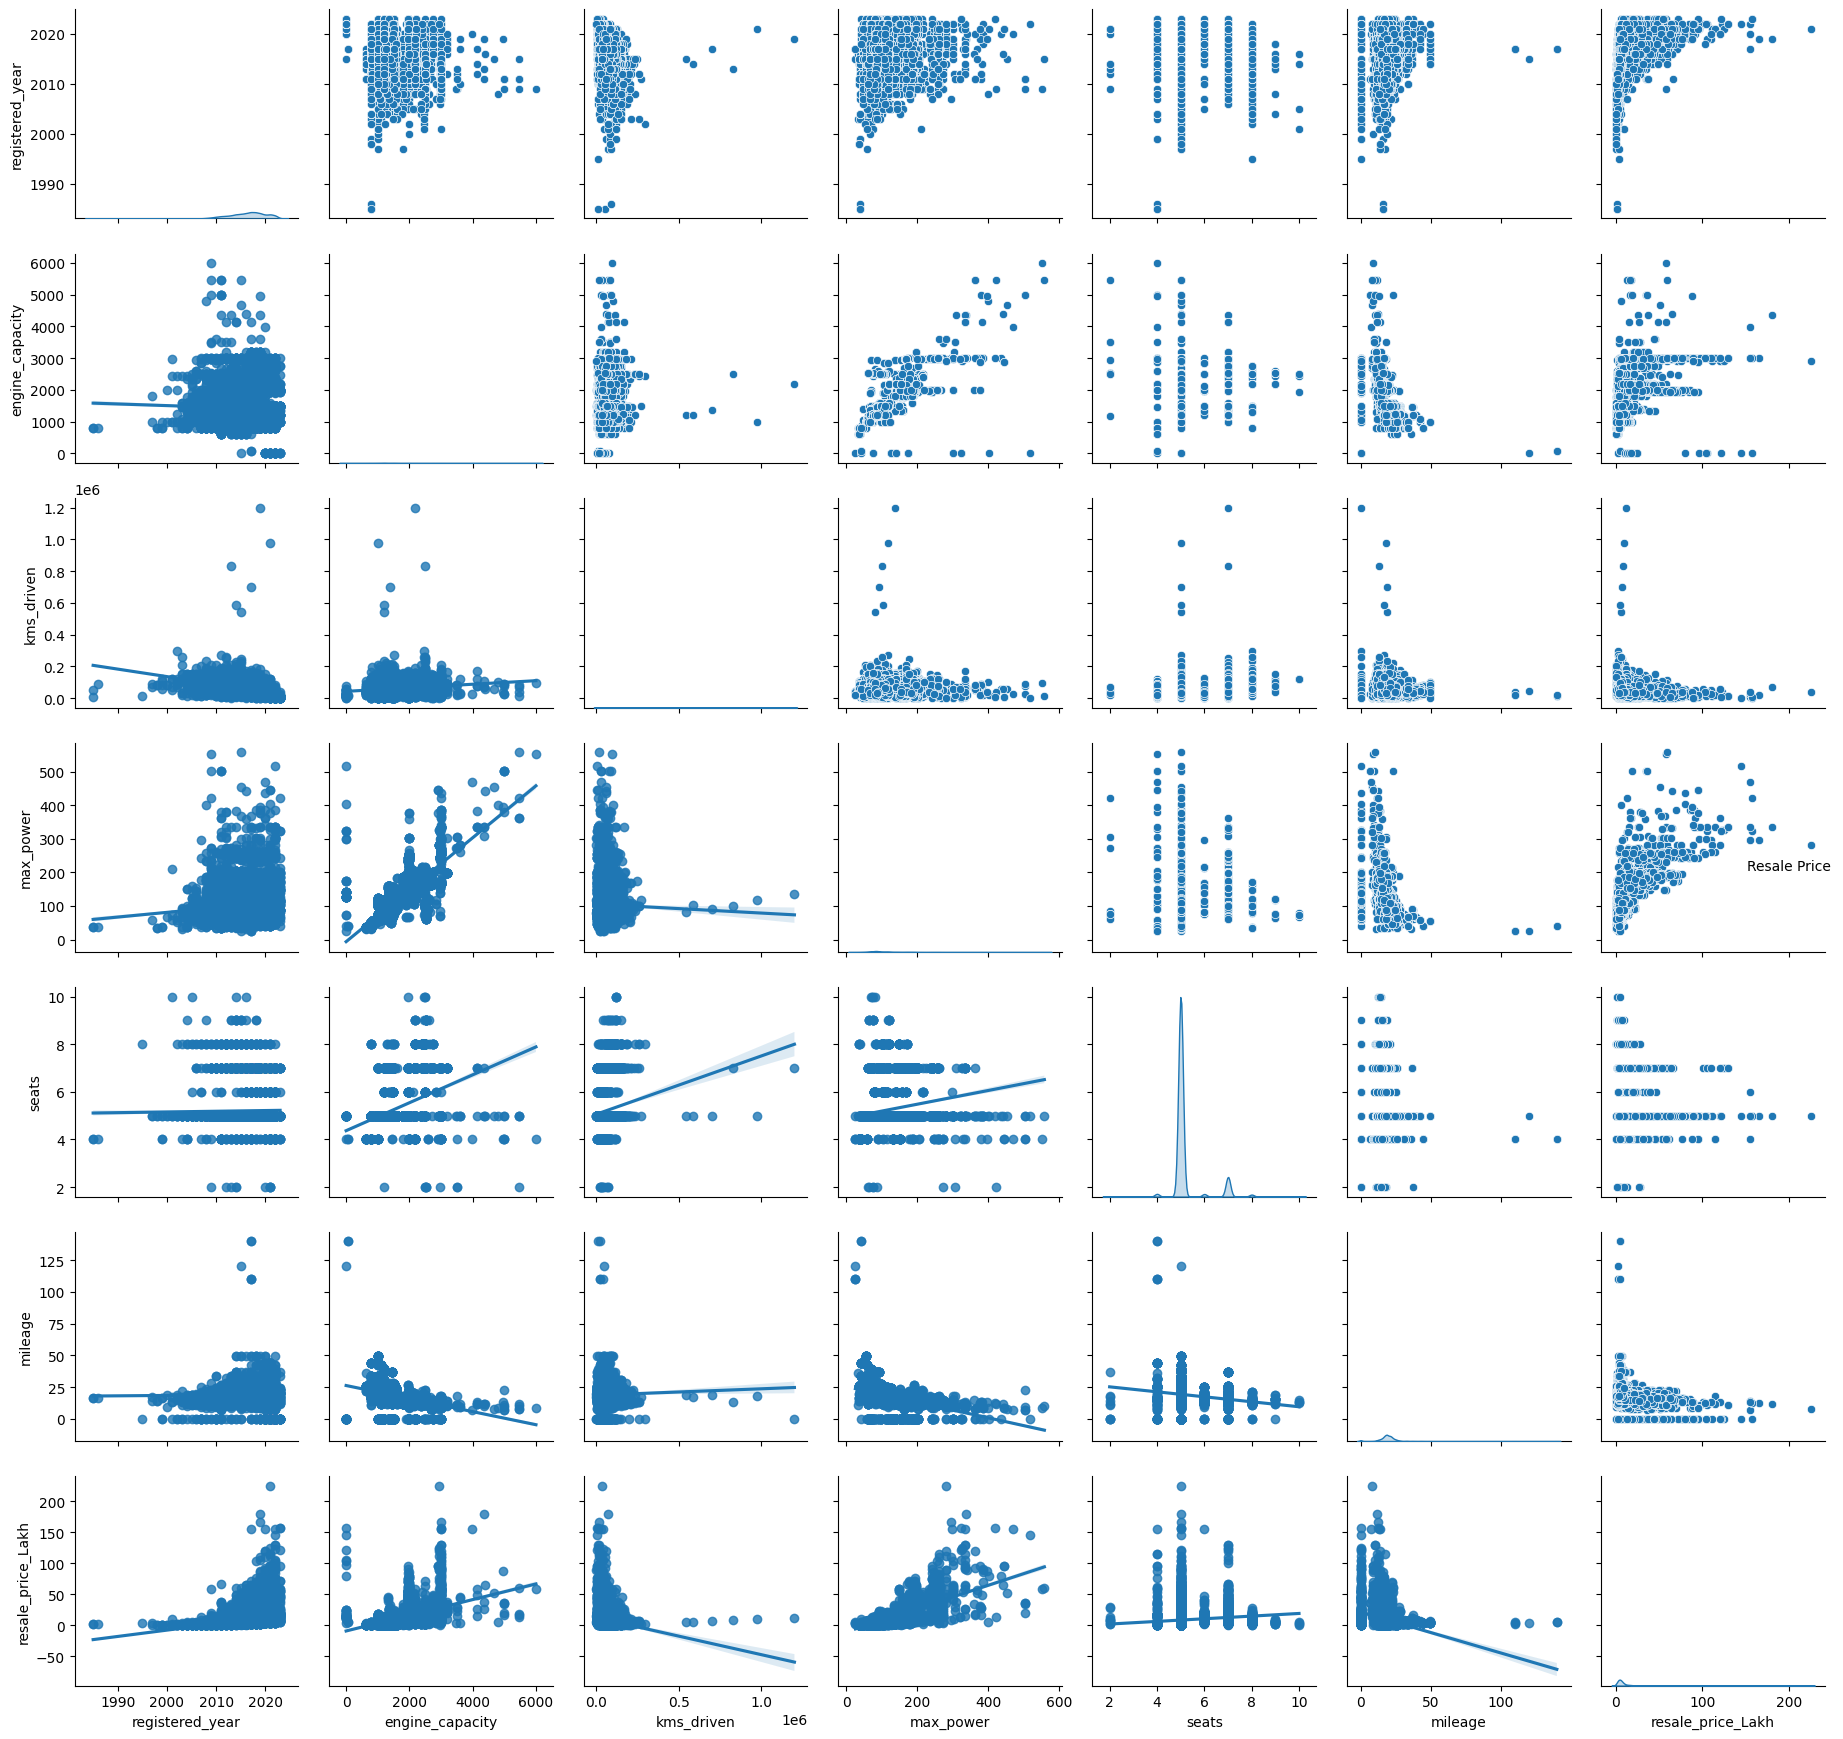

In [73]:
my_plot = sns.PairGrid(df)
my_plot = my_plot.map_diag(sns.kdeplot, shade=True)
my_plot = my_plot.map_lower(sns.regplot)
my_plot = my_plot.map_upper(sns.scatterplot).add_legend(title='Resale Price')
plt.tight_layout()

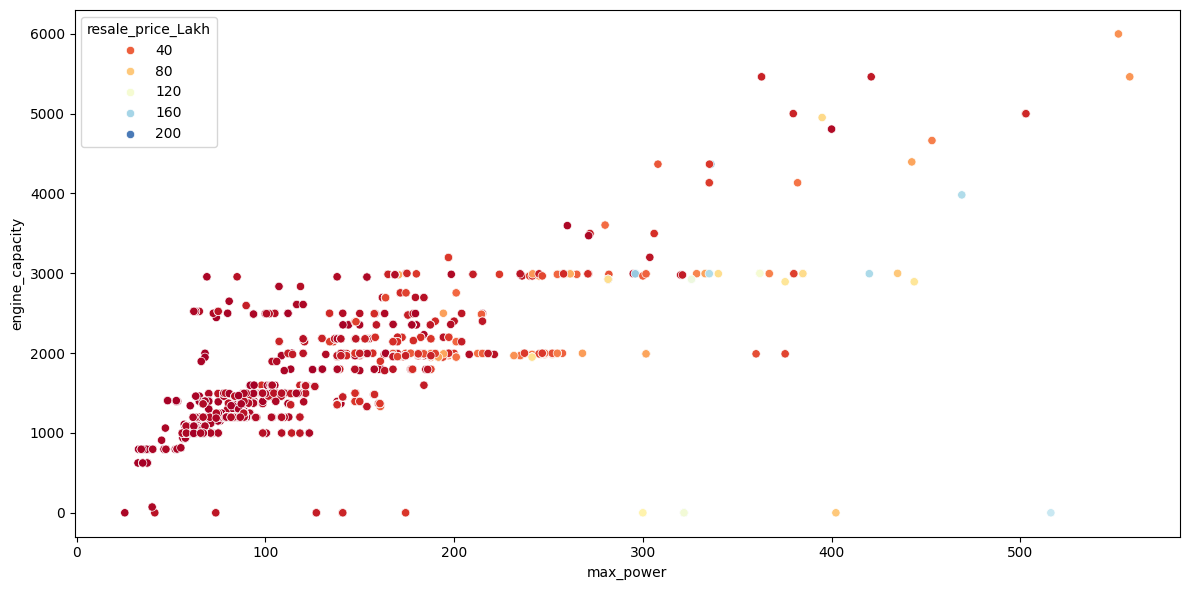

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["max_power"],y=df["engine_capacity"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

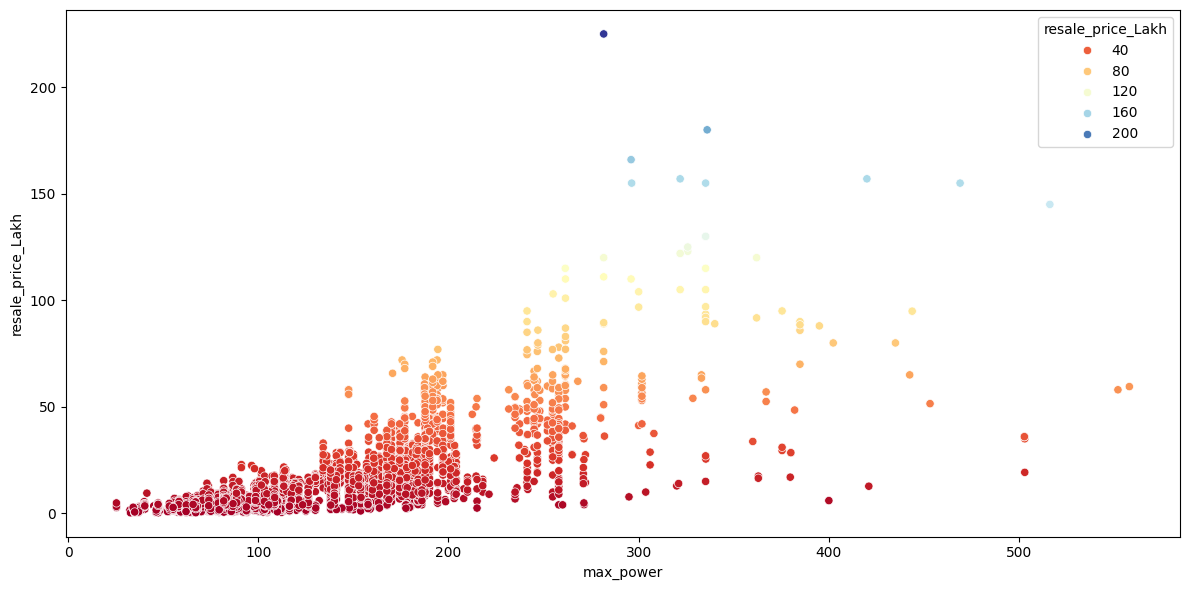

In [75]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["max_power"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

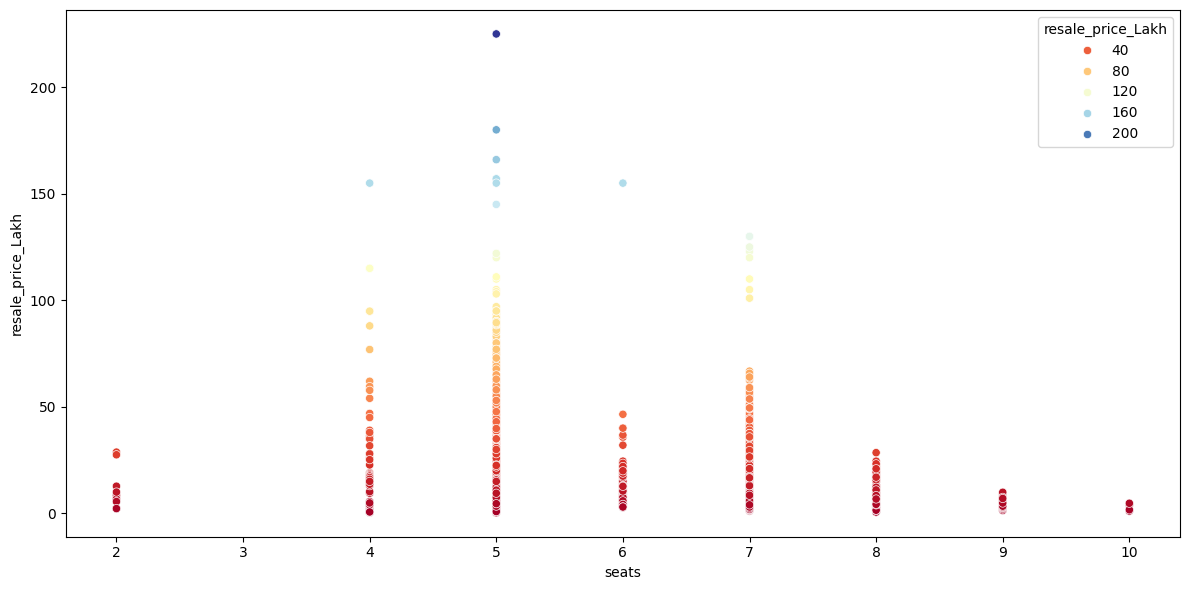

In [76]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["seats"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

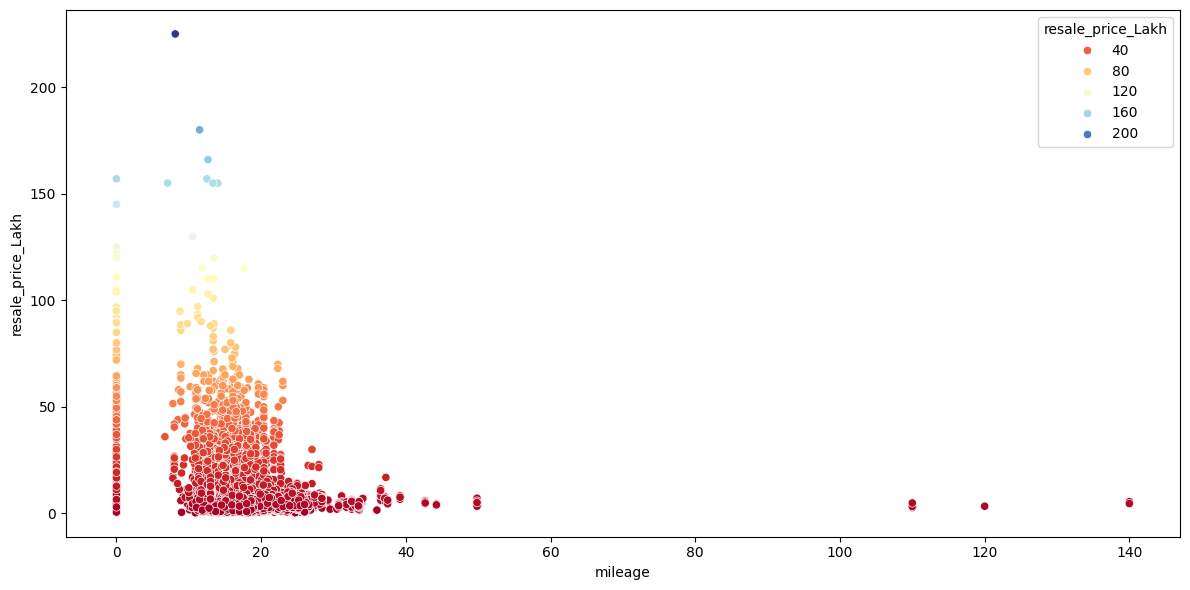

In [77]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df["mileage"],y=df["resale_price_Lakh"],hue=df["resale_price_Lakh"],palette="RdYlBu")
plt.tight_layout()

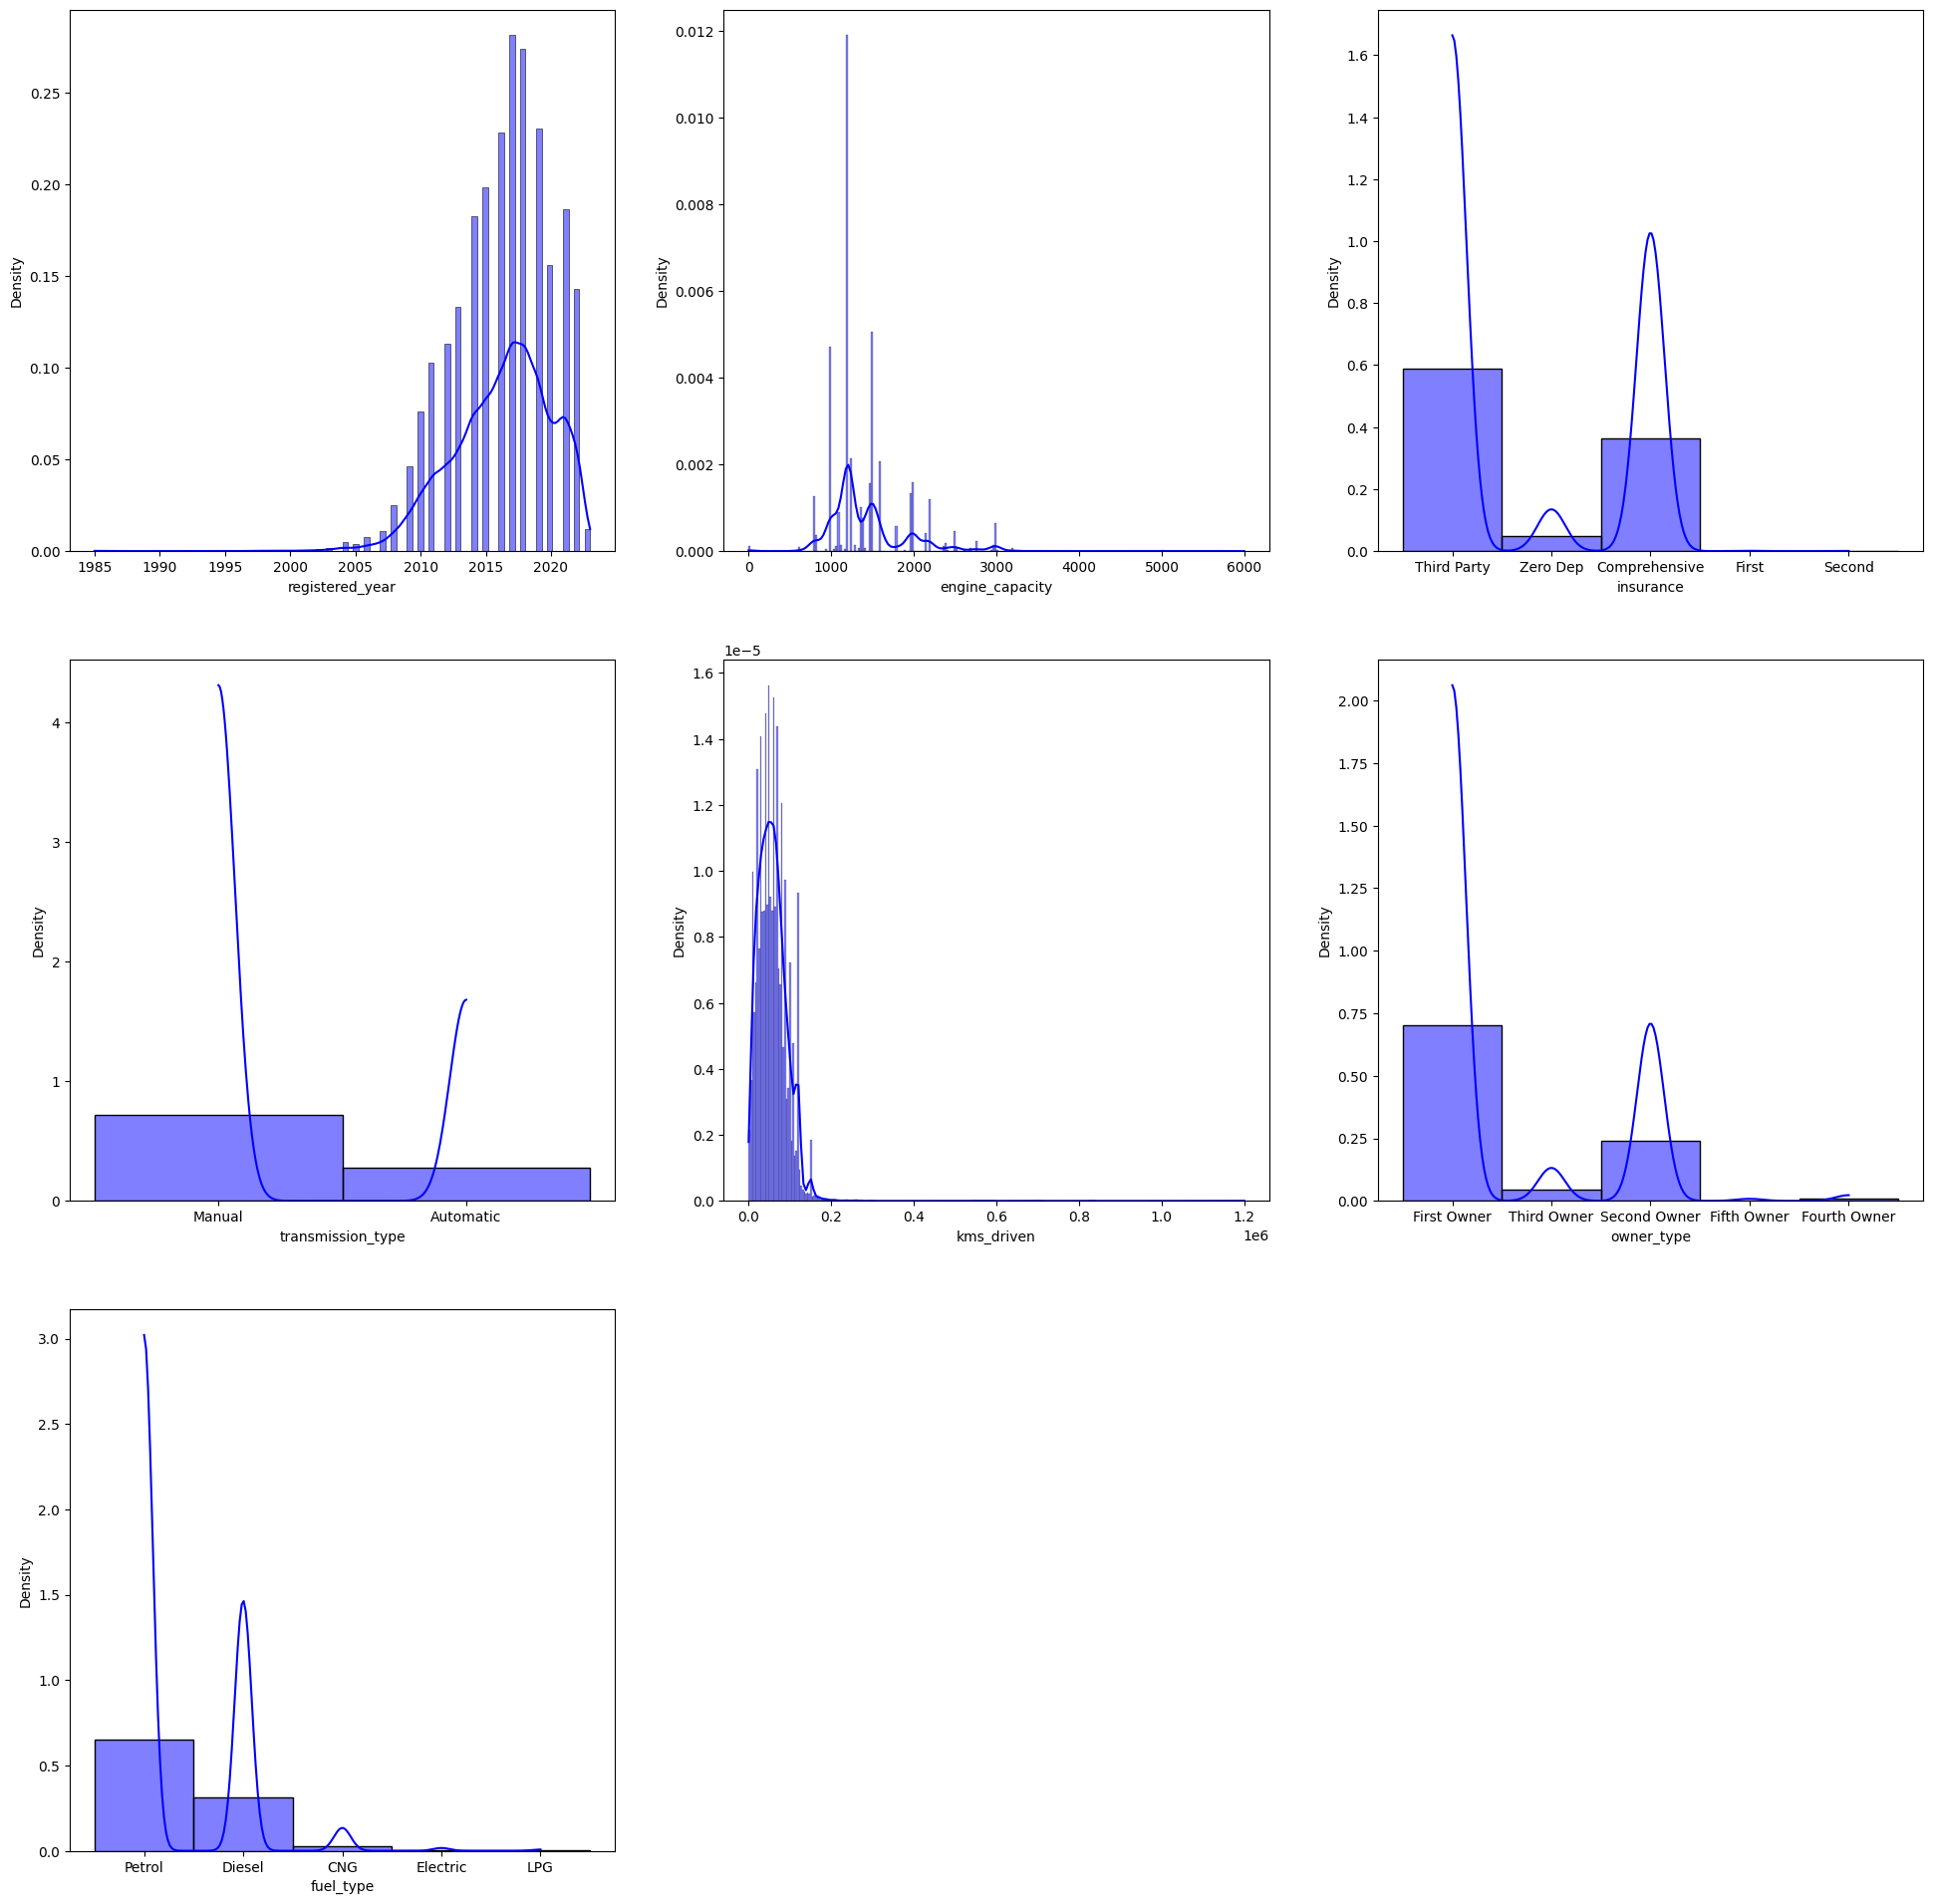

In [78]:

fig, ax1 = plt.subplots(3,3, figsize=(24,24))
k = 0
columns = list(col for col in df.columns if col != "full_name")
for i in range(3):
    for j in range(3):
            sns.histplot(df[columns[k]], ax = ax1[i][j], color = 'blue', kde=True, stat="density")
            k += 1
            if k > 6:
                break
    if k > 6:
                break
fig.delaxes(ax1[2,2]) # The indexing is zero-based here
fig.delaxes(ax1[2,1])
plt.show()


C:\Users\letic\AppData\Local\Temp\ipykernel_20024\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\letic\AppData\Local\Temp\ipykernel_20024\4024774584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
C:\Users\l

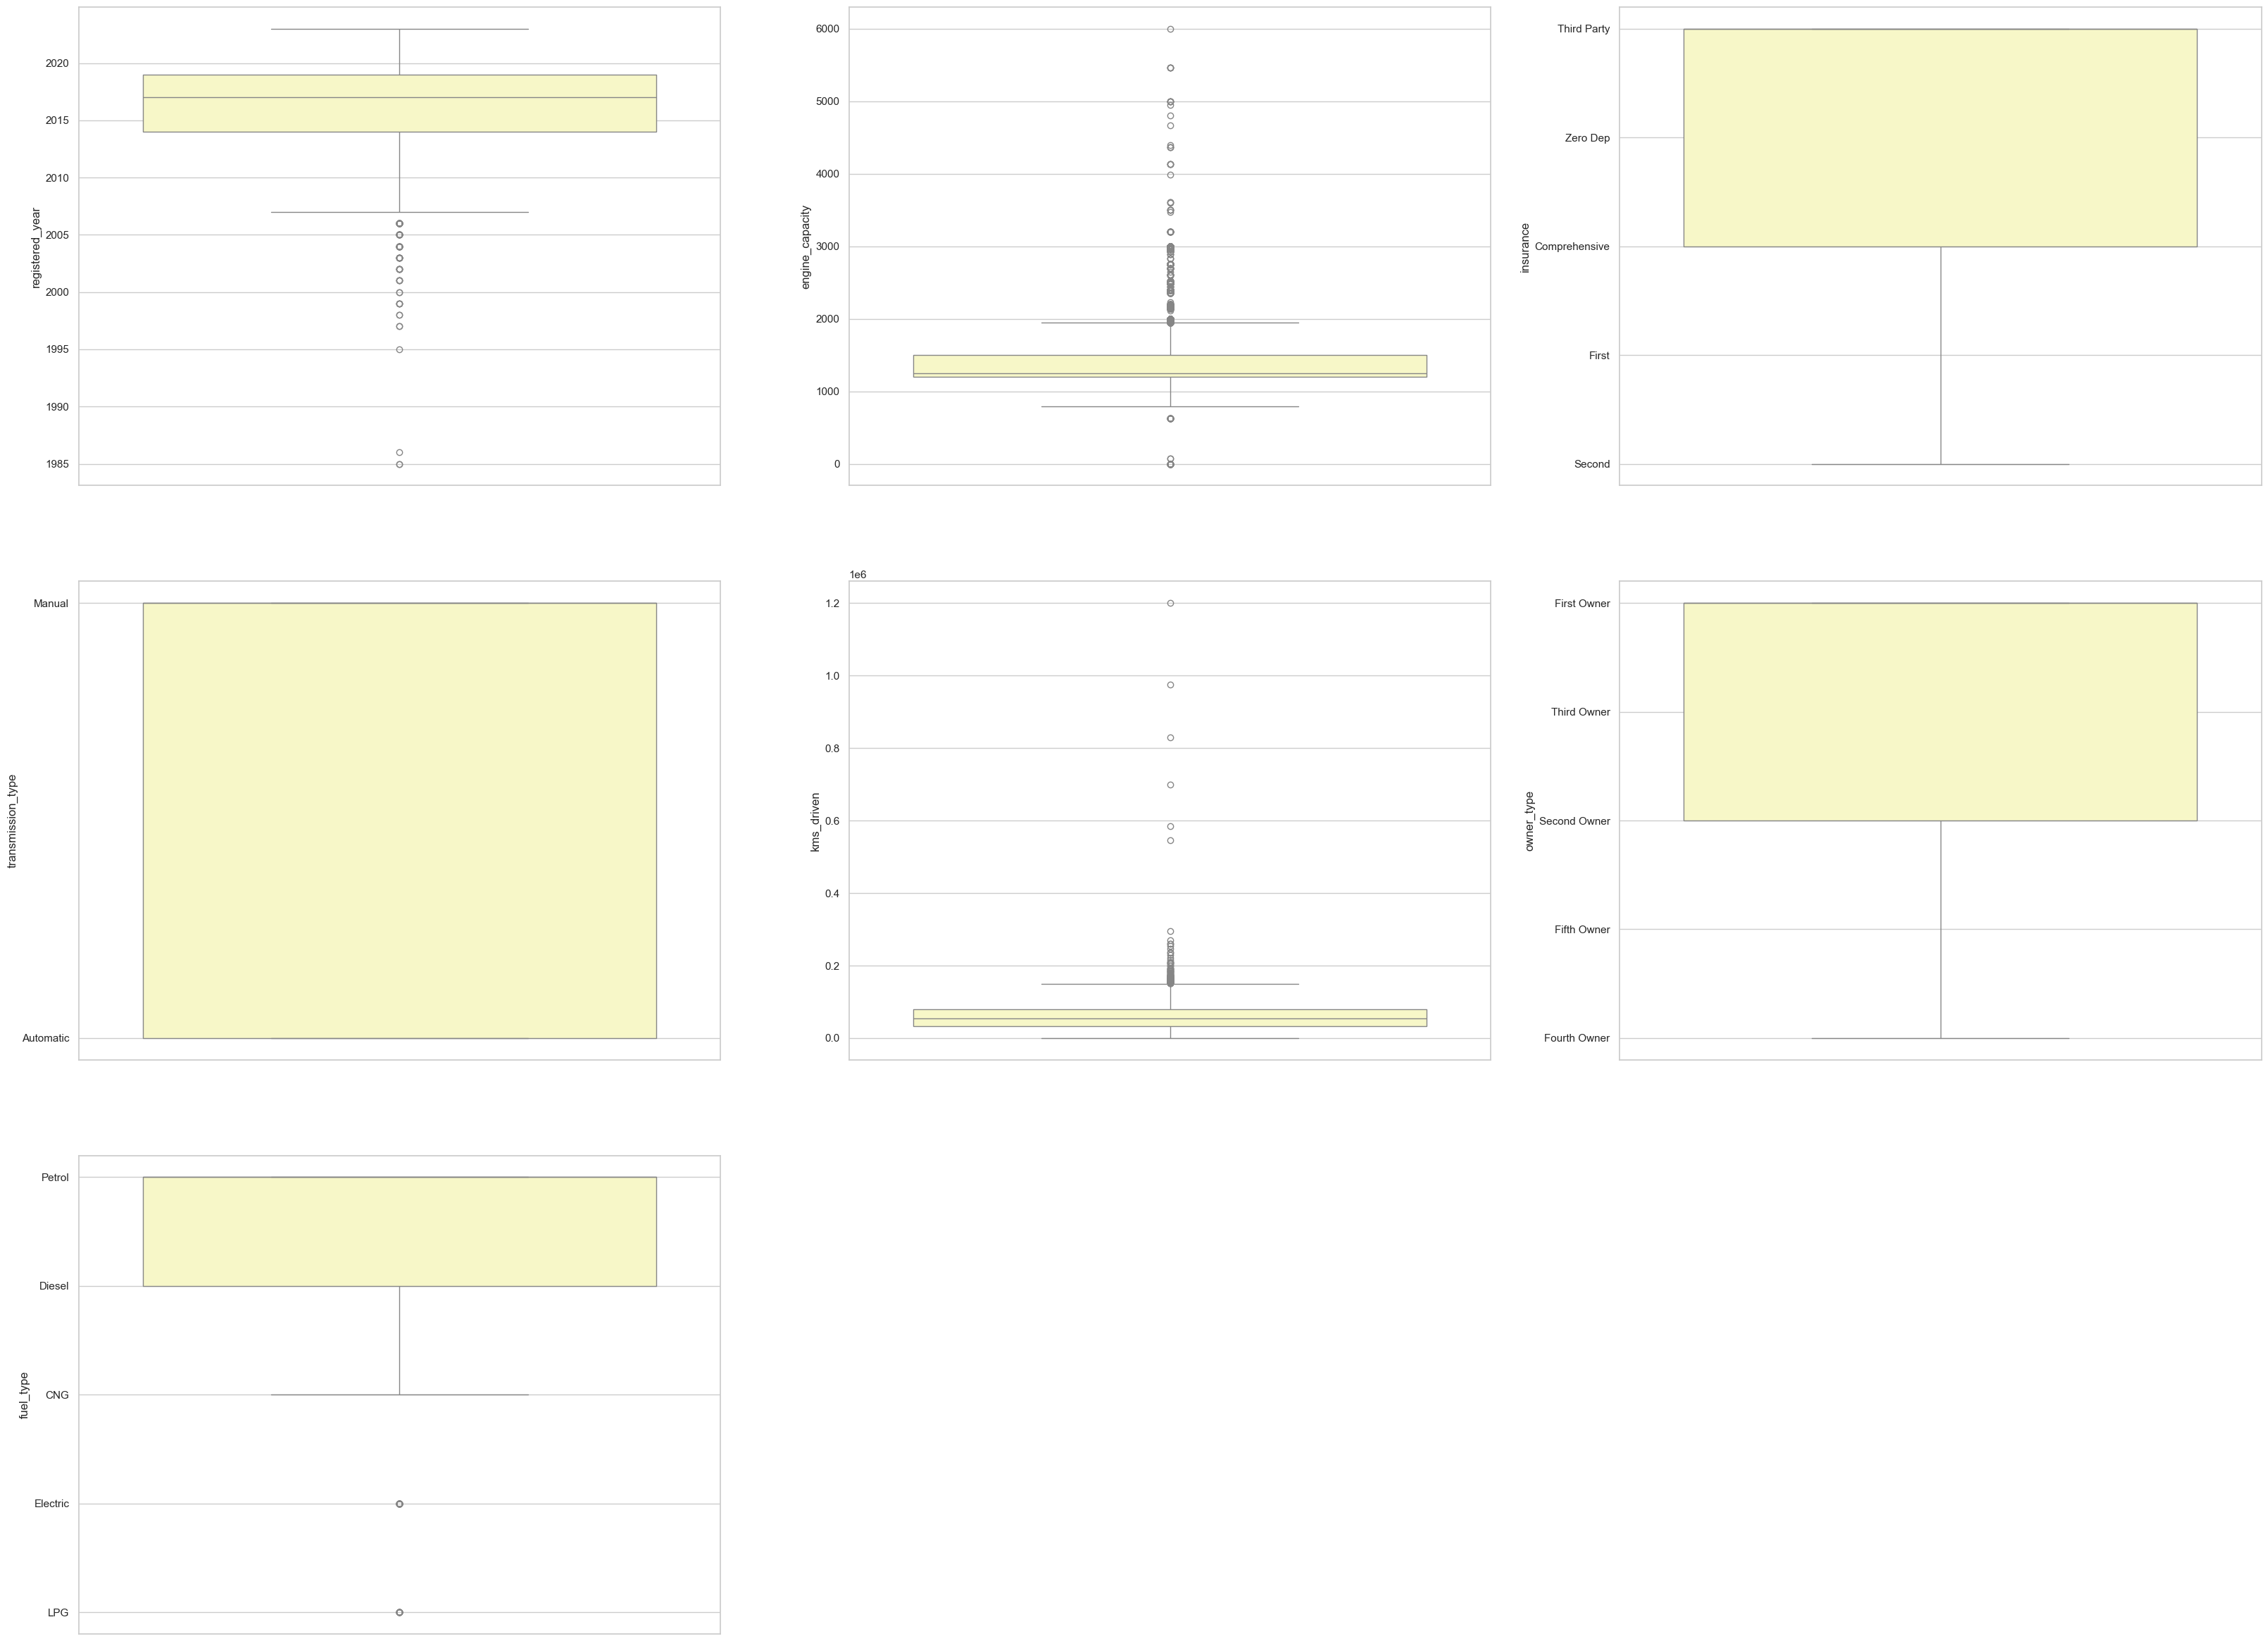

In [79]:
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(3,3, figsize=(40,30))
col = 0
for i in range(3):
    for j in range(3):
            sns.boxplot( y=df[columns[col]], ax = ax1[i][j], orient='v',palette="RdYlBu")
            col += 1
            if col > 6:
                break
    if col > 6:
                break
            
fig.delaxes(ax1[2,2]) 
fig.delaxes(ax1[2,1])
plt.show()

In [81]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year        int64
engine_capacity      float64
insurance             object
transmission_type     object
kms_driven           float64
owner_type            object
fuel_type             object
max_power            float64
seats                float64
mileage              float64
body_type             object
city                  object
resale_price_Lakh    float64
marca                 object
dtype: object


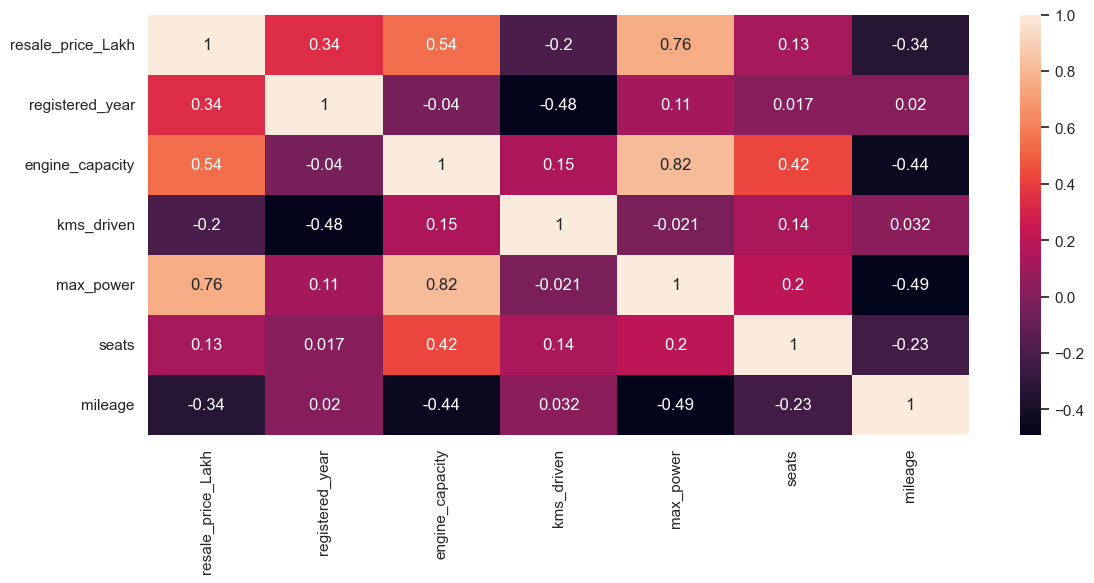

In [82]:
corr_df = df[["resale_price_Lakh","registered_year","engine_capacity","kms_driven","max_power","seats","mileage"]]
plt.figure(figsize=(12,6))
sns.heatmap(corr_df.corr(),annot=True)
plt.tight_layout()

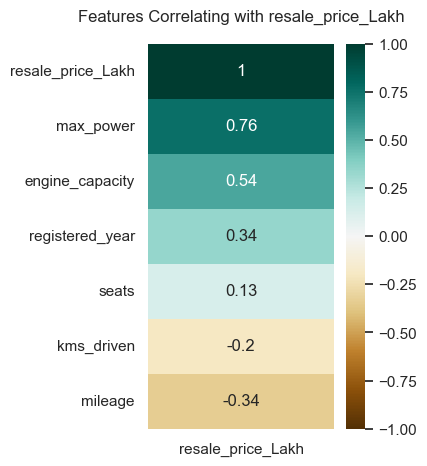

In [83]:

columns_of_interest = ['resale_price_Lakh','registered_year','engine_capacity','kms_driven','max_power','seats','mileage']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))


heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()